In [ ]:
import sqlite3

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
conn = sqlite3.connect("beegeez_sales_data_sqlite3.db")

In [ ]:
# Connect to the SQLite database
conn = sqlite3.connect('your_database.db')

# Get the list of table names
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)

# Display the table names
print(tables)

Empty DataFrame
Columns: [name]
Index: []


In [16]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [17]:
path = '/content/sample_data/beegeez_sales_data_sqlite3.db'
con = sqlite3.Connection(path)


In [19]:
query = """
SELECT *
FROM sales;
"""
observations = pd.read_sql(query, con)

print(observations)

DatabaseError: ignored

In [15]:
# Connect to the SQLite database
conn = sqlite3.connect(path)

# Query the sales data
query = """
SELECT Order_Date, Total_Revenue, Total_Profit 
FROM 
sales;
"""
var= pd.read_sql(query, conn)
var['Order_Date'] = pd.to_datetime(var['Order_Date'])
var.set_index('Order_Date', inplace=True)

yearly_revenues = var['Total_Revenue'].resample('Y').sum()
yearly_profits = var['Total_Profit'].resample('Y').sum()

DatabaseError: ignored

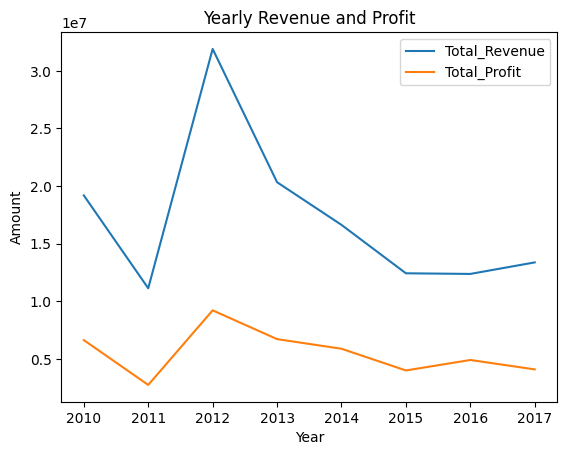

In [ ]:
plt.plot(yearly_revenues.index.year, yearly_revenues.values, label='Total_Revenue')
plt.plot(yearly_profits.index.year, yearly_profits.values, label='Total_Profit')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Yearly Revenue and Profit')
plt.legend()
plt.show()

In [ ]:
query = """SELECT Item_Type, SUM(Total_Revenue) AS TotalRevenue, SUM(Total_Profit) AS TotalProfit 
FROM
sales GROUP BY Item_Type
"""
var1 = pd.read_sql_query(query, conn)

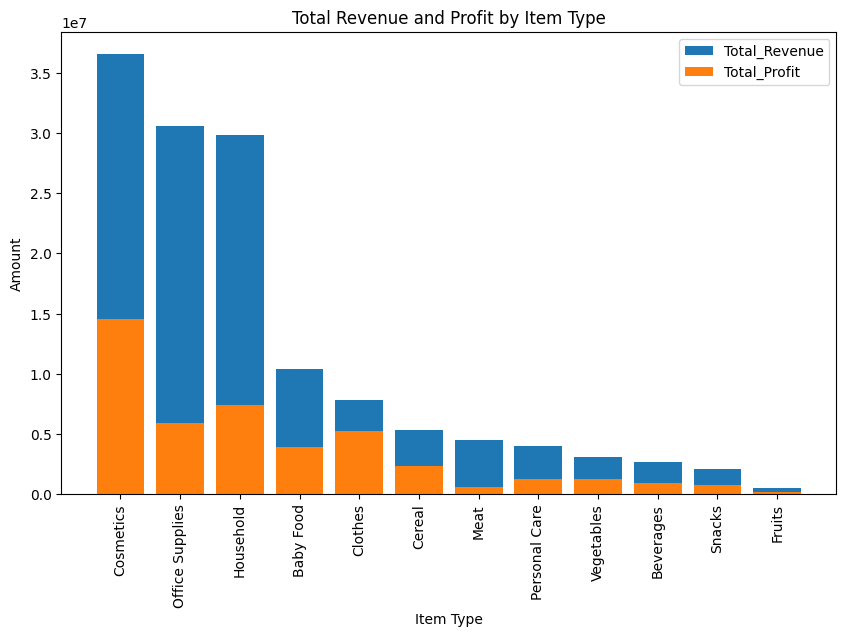

In [ ]:
var1.sort_values('TotalRevenue', ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
plt.bar(var1['Item_Type'], var1['TotalRevenue'], label='Total_Revenue')
plt.bar(var1['Item_Type'], var1['TotalProfit'], label='Total_Profit')
plt.xlabel('Item Type')
plt.ylabel('Amount')
plt.title('Total Revenue and Profit by Item Type')
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [ ]:
query = """SELECT Region, SUM(Total_Revenue) AS TotalRevenue, SUM(Total_Profit) AS TotalProfit 
FROM
sales GROUP BY Region
"""
var1 = pd.read_sql_query(query, conn)

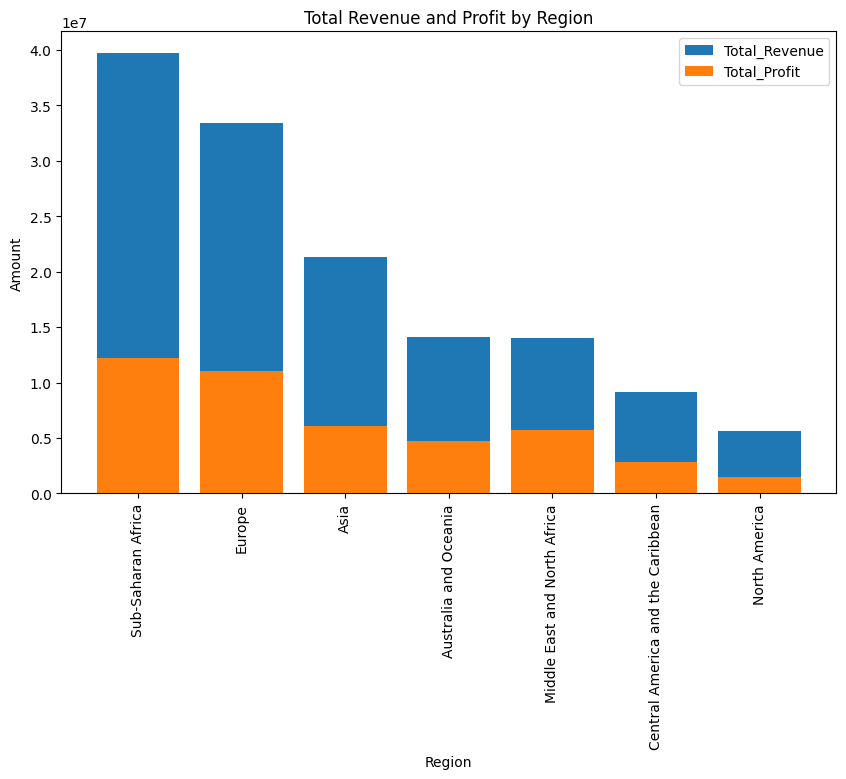

In [ ]:
var1.sort_values('TotalRevenue', ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
plt.bar(var1['Region'], var1['TotalRevenue'], label='Total_Revenue')
plt.bar(var1['Region'], var1['TotalProfit'], label='Total_Profit')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.title('Total Revenue and Profit by Region')
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [ ]:
online_query = """SELECT Order_Date, Total_Revenue, Total_Profit
FROM 
sales 
WHERE Sales_Channel = 'Online'"""
online_data = pd.read_sql_query(online_query, conn)

# Query the sales data for Offline channel
offline_query = """SELECT Order_Date, Total_Revenue, Total_Profit
FROM 
sales 
WHERE Sales_Channel = 'Offline'"""
offline_data = pd.read_sql_query(offline_query, conn)

In [ ]:
online_data['Order_Date'] = pd.to_datetime(online_data['Order_Date'])
online_data.set_index('Order_Date', inplace=True)

offline_data['Order_Date'] = pd.to_datetime(offline_data['Order_Date'])
offline_data.set_index('Order_Date', inplace=True)

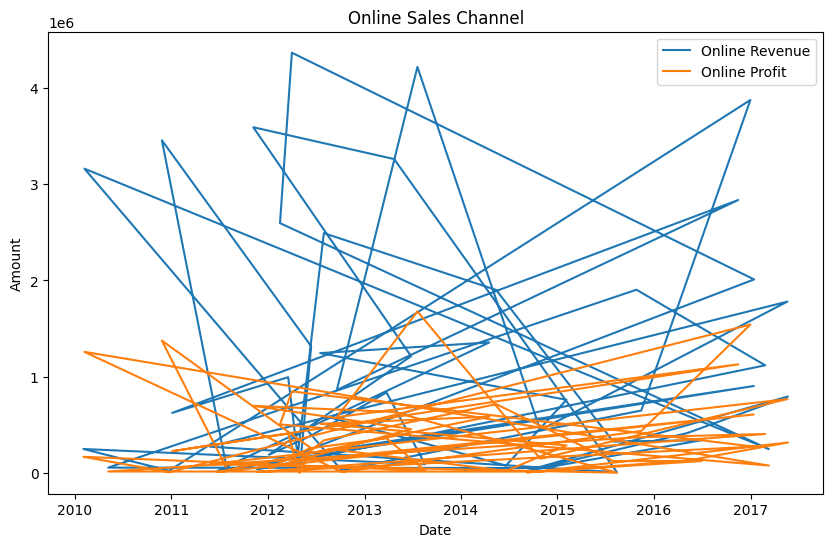

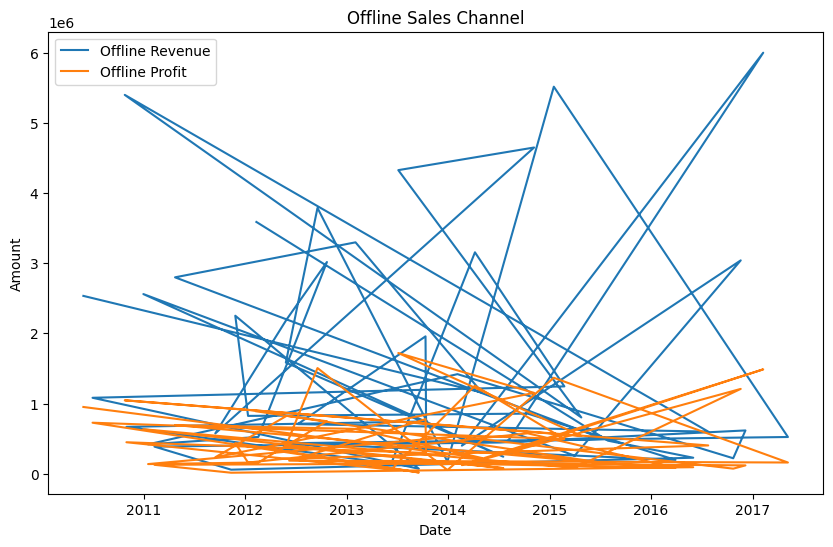

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(online_data.index, online_data['Total_Revenue'], label='Online Revenue')
plt.plot(online_data.index, online_data['Total_Profit'], label='Online Profit')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Online Sales Channel')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(offline_data.index, offline_data['Total_Revenue'], label='Offline Revenue')
plt.plot(offline_data.index, offline_data['Total_Profit'], label='Offline Profit')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Offline Sales Channel')
plt.legend()
plt.show()


In [ ]:
revenue_query = """SELECT Sales_Channel, SUM(Total_Revenue) AS TotalRevenue
FROM
sales
GROUP BY Sales_Channel"""
revenue_data = pd.read_sql_query(revenue_query, conn)

# Query the total profit by region and sales channel
profit_query = """SELECT Region, Sales_Channel, SUM(Total_Profit) AS TotalProfit
FROM
sales GROUP
BY Region, Sales_Channel"""
profit_data = pd.read_sql_query(profit_query, conn)

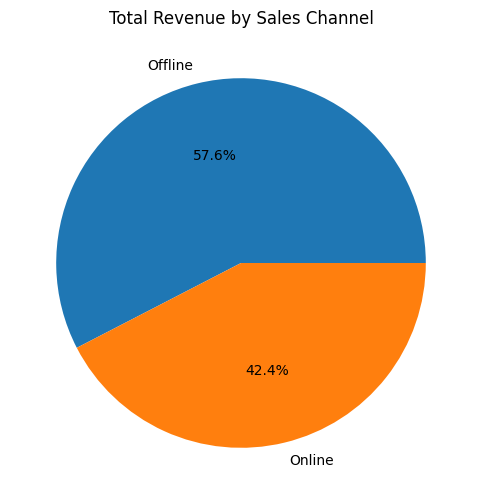

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(revenue_data['TotalRevenue'], labels=revenue_data['Sales_Channel'], autopct='%1.1f%%')
plt.title('Total Revenue by Sales Channel')
plt.show()


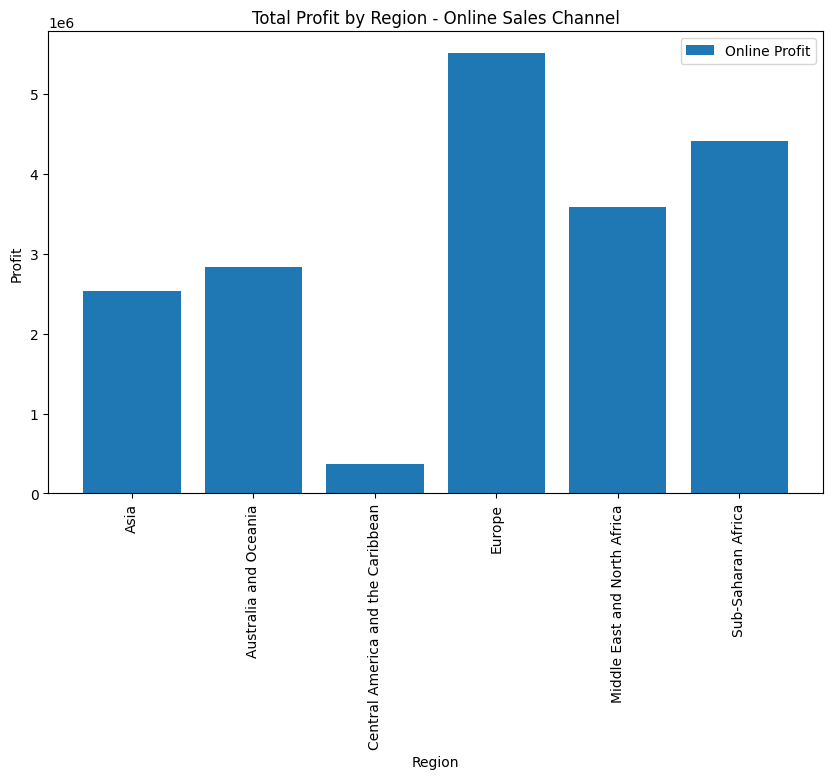

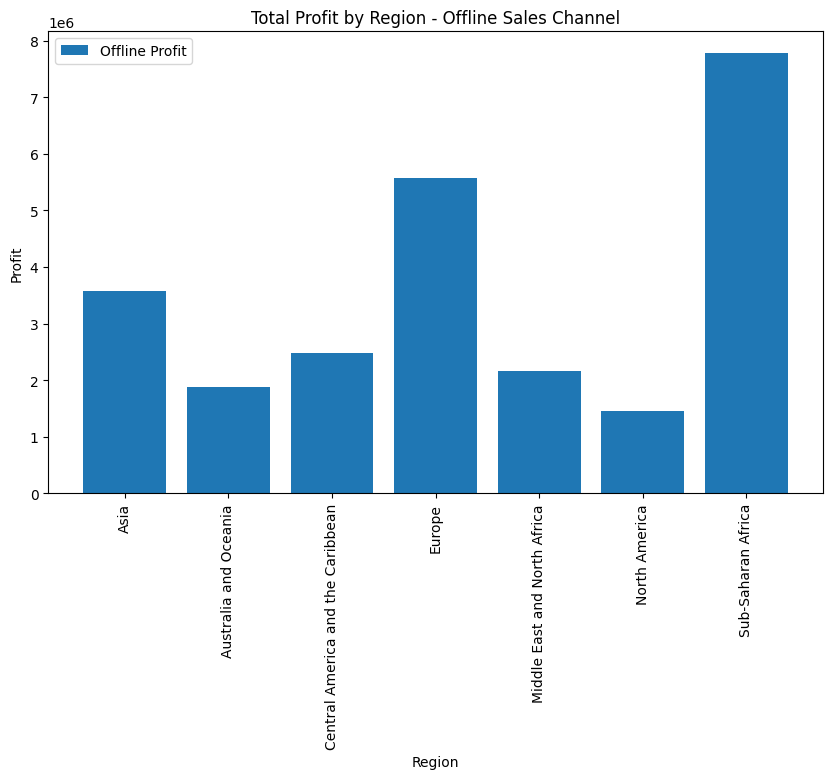

In [ ]:
# Separate profit data for each sales channel
online_profit_data = profit_data[profit_data['Sales_Channel'] == 'Online']
offline_profit_data = profit_data[profit_data['Sales_Channel'] == 'Offline']

# Create bar charts for each sales channel
plt.figure(figsize=(10, 6))
plt.bar(online_profit_data['Region'], online_profit_data['TotalProfit'], label='Online Profit')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.title('Total Profit by Region - Online Sales Channel')
plt.xticks(rotation=90)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(offline_profit_data['Region'], offline_profit_data['TotalProfit'], label='Offline Profit')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.title('Total Profit by Region - Offline Sales Channel')
plt.xticks(rotation=90)
plt.legend()
plt.show()


In [ ]:
query1 = """SELECT Item_Type, Sales_Channel, SUM(Total_Revenue) AS TotalRevenue
FROM
sales
GROUP BY Item_Type, Sales_Channel"""
var2 = pd.read_sql_query(query1, conn)

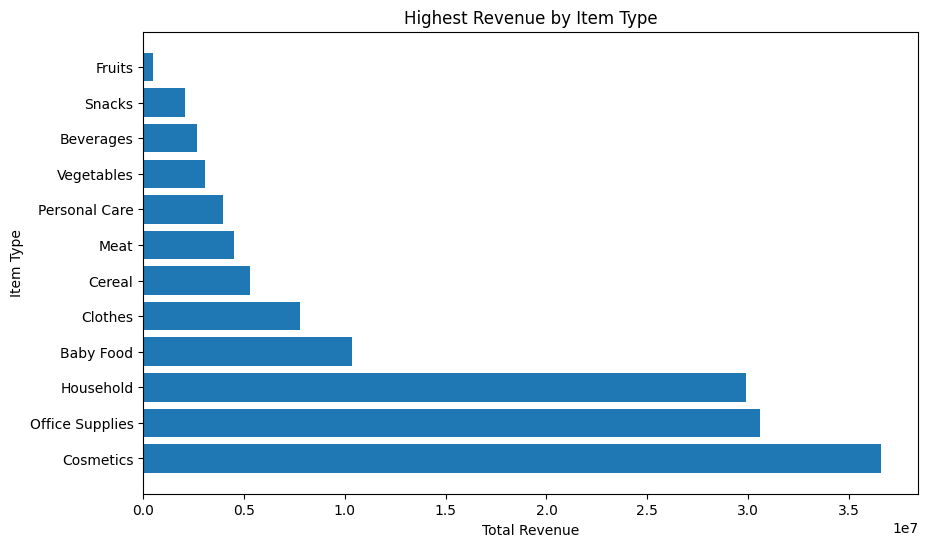

In [ ]:
pivot_data = var2.pivot(index='Item_Type', columns='Sales_Channel', values='TotalRevenue')
pivot_data['TotalRevenue'] = pivot_data.sum(axis=1)
pivot_data.sort_values('TotalRevenue', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.barh(pivot_data.index, pivot_data['TotalRevenue'])
plt.xlabel('Total Revenue')
plt.ylabel('Item Type')
plt.title('Highest Revenue by Item Type')
plt.show()


In [ ]:
#get information about the columns in a table
cur.execute("PRAGMA table_info(sales)")
results = cur.fetchall()
for row in results:
    print(row)

In [ ]:
# Get information about foreign keys in the sales table
cur.execute("PRAGMA foreign_key_list(sales)")
results = cur.fetchall()
for row in results:
    print(row)

In [ ]:
# Get information about foreign keys in the indexes table
cur.execute("PRAGMA index_list(sales)")
results = cur.fetchall()
for row in results:
    print(row)

In [14]:
query3= """SELECT COUNTRY, REGION, ITEM_TYPE
FROM 
sales """
var3 = pd.read_sql_query(query3, conn)
print(var3)

DatabaseError: ignored

In [ ]:
cur.execute("SELECT COUNTRY, REGION, ITEM_TYPE FROM SALES WHERE UNIT_COST <100")
results = cur.fetchall()
for row in results:
    print(row)

('Sao Tome and Principe', 'Sub-Saharan Africa', 'Fruits')
('Burkina Faso', 'Sub-Saharan Africa', 'Vegetables')
('Republic of the Congo', 'Sub-Saharan Africa', 'Personal Care')
('Kyrgyzstan', 'Asia', 'Vegetables')
('Cape Verde', 'Sub-Saharan Africa', 'Clothes')
('Bangladesh', 'Asia', 'Clothes')
('Mongolia', 'Asia', 'Personal Care')
('Bulgaria', 'Europe', 'Clothes')
('Cameroon', 'Sub-Saharan Africa', 'Beverages')
('Honduras', 'Central America and the Caribbean', 'Snacks')
('New Zealand', 'Australia and Oceania', 'Fruits')
('Moldova ', 'Europe', 'Personal Care')
('Kiribati', 'Australia and Oceania', 'Fruits')
('Mali', 'Sub-Saharan Africa', 'Fruits')
('Norway', 'Europe', 'Beverages')
('South Sudan', 'Sub-Saharan Africa', 'Personal Care')
('Djibouti', 'Sub-Saharan Africa', 'Snacks')
('Costa Rica', 'Central America and the Caribbean', 'Personal Care')
('Syria', 'Middle East and North Africa', 'Fruits')
('Niger', 'Sub-Saharan Africa', 'Personal Care')
('Slovakia', 'Europe', 'Vegetables')
('My

In [ ]:
conn.close()

In [ ]:
conn = sqlite3.connect('beegeez_sales_data.db')

In [ ]:
cur = conn.cursor()
cur.execute("SELECT Region FROM sales")
results = cur.fetchall()
for row in results:
    print(row)


In [ ]:
#filtering grouping & aggregation
df_sales = pd.read_sql_query("SELECT * FROM sales;", conn)

# Display the data frame
print(df_sales.head())

In [ ]:
df_sales = pd.read_sql_query("SELECT Region, Country, Item_Type FROM sales;", conn)

# Display the data frame
print(df_sales.head())

In [ ]:
df_high_price_orders = df_sales_price[df_sales_price['Unit_Price'] > 100]

# Display the filtered data frame
print(df_high_price_orders.head())

In [ ]:
df_orders_by_sales = df_orders.groupby('Region').agg({'total_price': ['mean', 'sum']})

# Flatten the multi-level column index
df_orders_by_sales.columns = ['_'.join(col).strip() for col in df_orders_by_sales.columns.values]

# Display the grouped data frame
print(df_orders_by_sales.head())

In [ ]:
#cleaing and preprocessing
df_sales = pd.read_sql_query("SELECT * FROM sales;", conn)

# Check for missing values
print(df_sales.isnull().sum())

# Fill in missing values with the mean or median as appropriate
df_sales['age'].fillna(df_sales['age'].mean(), inplace=True)

# Check for inconsistent values
print(df_sales['gender'].unique())

# Standardize categorical variables
df_sales['gender'].replace({'M': 'Male', 'F': 'Female'}, inplace=True)

# Remove duplicates
df_sales.drop_duplicates(inplace=True)

# Convert data types
df_sales['date_of_birth'] = pd.to_datetime(df_sales['date_of_birth'])

# Display the cleaned and pre-processed data frame
print(df_sales.head())

In [ ]:
sales_data = pd.read_sql_query('SELECT * FROM sales', conn)

# check for missing values
print(sales_data.isnull().sum())

# replace missing values with 0
sales_data = sales_data.fillna(0)

# check for inconsistent values
print(sales_data['Units_Sold'].unique())

# replace inconsistent values with 0
sales_data.loc[sales_data['Units_Sold'] < 0, 'Units_Sold'] = 0

# drop unnecessary columns
sales_data = sales_data.drop(['Region', 'Order_Date'], axis=1)

# convert Ship_Date column to datetime format
sales_data['Ship_Date'] = pd.to_datetime(sales_data['Ship_Date'])

# set Ship_Date as the index
sales_data = sales_data.set_index('Ship_Date')

# resample the data to monthly frequency
sales_data_monthly = sales_data.resample('M').sum()